In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [3]:
DATASET_PATH = Path ('/Users/orion/CAS_771/data1')

In [4]:
# Build the datablock
drowsiness_datablock = DataBlock(
    get_items = get_image_files,
    get_y = parent_label,
    blocks = (ImageBlock, CategoryBlock),
    #item_tfms = RandomResizedCrop(224, min_scale = 0.3), #resized
    splitter = GrandparentSplitter(valid_name = 'test'), #splitter
    #batch_tfms = aug_transforms(mult = 2) #data augmentation 
)

In [5]:
#parent_label(DATASET_PATH)

In [6]:
dls = drowsiness_datablock.dataloaders(DATASET_PATH)

In [7]:
# the model is resnet 50, can change to the different model by change the attribute 
learn = vision_learner(dls, models.resnet50, metrics = accuracy)

/Users/orion/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/orion/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
#show optimizer function
learn.opt_func

<function fastai.optimizer.Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)>

In [9]:
#show loss function
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

SuggestedLRs(valley=0.0020892962347716093)

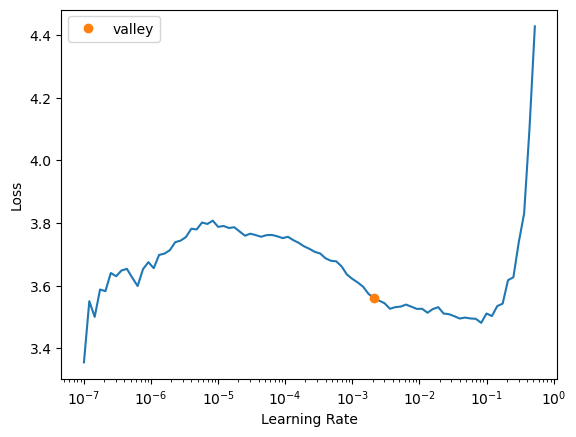

In [10]:
# find the best learning rate
learn.lr_find()

In [11]:
# Train the model
learn.fit_one_cycle(18, 0.0020892962347716093)

epoch,train_loss,valid_loss,accuracy,time
0,2.349208,1.941050,0.313700,05:02
1,1.938712,1.789578,0.394000,05:31
2,1.655145,1.795273,0.463200,04:46
3,1.547036,1.484920,0.503500,04:43
4,1.404496,1.337503,0.521600,04:34
5,1.345772,1.351203,0.550600,04:30
6,1.258020,1.221409,0.565000,04:29
7,1.177259,1.199014,0.575100,04:27
8,1.150877,1.205143,0.572000,06:01
9,1.080335,1.159410,0.591000,04:25


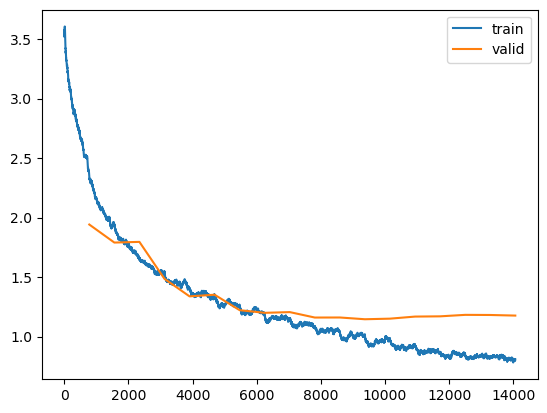

In [12]:
learn.recorder.plot_loss()

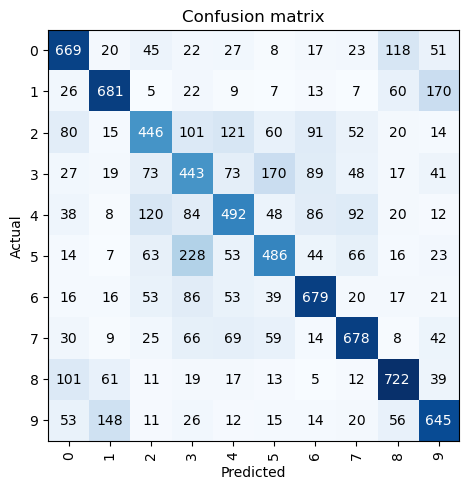

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

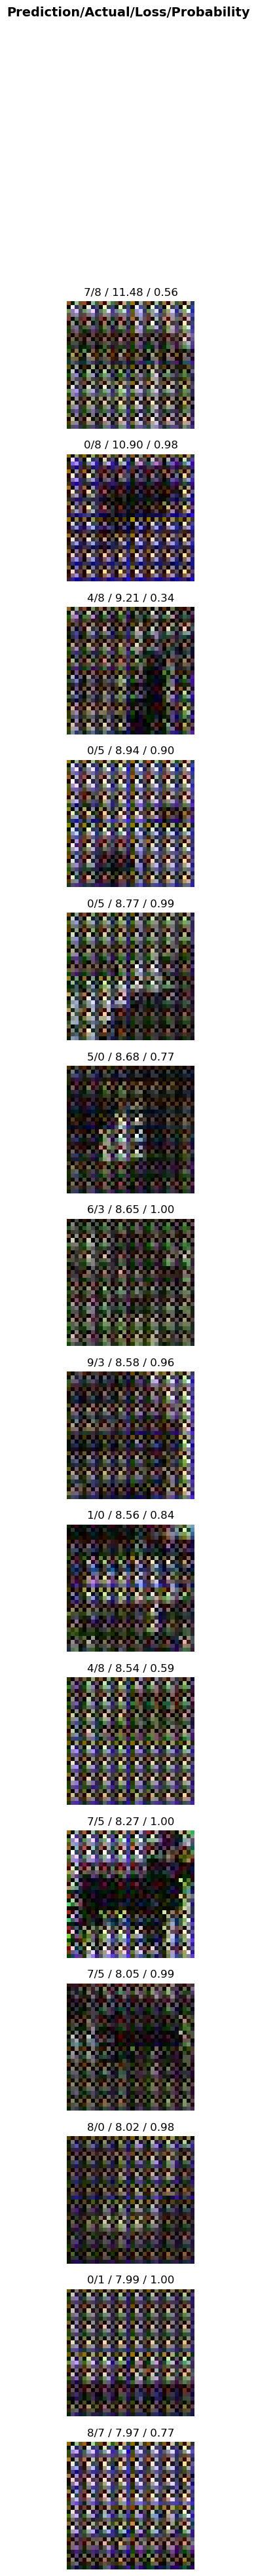

In [14]:
interp.plot_top_losses(15, nrows = 15)

In [15]:
# export the model
learn.export('/Users/orion/CAS_771/models/data1_Resnet50_59.pkl')